<a href="https://colab.research.google.com/github/pangpang-1234/Stock-Prediction-Models/blob/master/Kaggle_Dogs_vs_Cats(basic_fastai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initail step

In [ ]:
#importing required modules
import gdown
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision import datasets, transforms as T
import os
import torch.optim as optim
from PIL import ImageFile
from sklearn.metrics import accuracy_score
import imageio
from tqdm import tqdm

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(len(os.listdir('/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/test')))
print(len(os.listdir('/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/train (1)')))

12500
25000


In [4]:
path_train = '/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/train (1)'
train = os.listdir('/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/train (1)')

In [5]:
label = []
for i in train:
    if 'cat' in i:
        label.append(0)
    elif 'dog' in i:
        label.append(1)
label_np = np.array(label)
label_np.shape

(25000,)

#FAST AI

In [6]:
!pip install --upgrade efficientnet-pytorch -qqq
!pip install -qq fastai --upgrade

     |████████████████████████████████| 188 kB 28.6 MB/s 
     |████████████████████████████████| 60 kB 9.3 MB/s 


In [7]:
import fastai
from fastai.vision.all import *
from fastai.vision.augment import *

In [8]:
#Checking the availability of a GPU
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(device)

cuda


##create data frame

In [10]:
label_df = pd.DataFrame(label, columns=['labels'])
train_df = pd.DataFrame(train, columns=['img_name'])
df = pd.concat([train_df, label_df],axis=1)
df

,img_name,labels
0,cat.9105.jpg,0
1,cat.9098.jpg,0
2,cat.9096.jpg,0
3,cat.9114.jpg,0
4,cat.9101.jpg,0
...,...,...
24995,dog.1086.jpg,1
24996,dog.10908.jpg,1
24997,dog.10911.jpg,1
24998,dog.1094.jpg,1


In [11]:
df.labels.value_counts()

0    12500
1    12500
Name: labels, dtype: int64

In [12]:
dls = ImageDataLoaders.from_df(df, path_train, folder=None, device = 'cuda', item_tfms=Resize(224, 224))

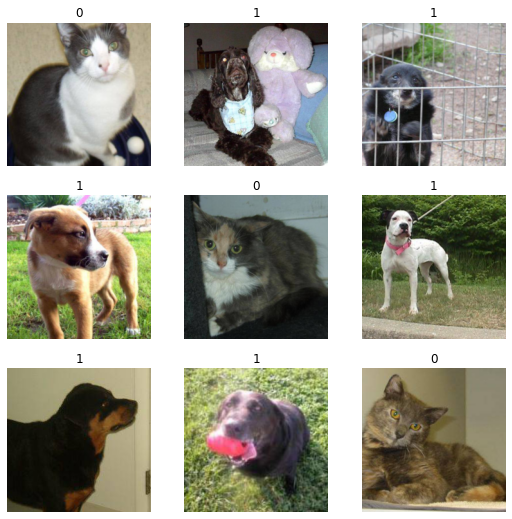

In [13]:
dls.show_batch()

##train 

In [14]:
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy,error_rate])
learn = learn.to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(2, 1e-3)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,error_rate,time


##predict

In [ ]:
test = os.listdir('/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/test/')
path_test = '/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/test/'

In [ ]:
fnames = get_image_files('/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/test')

In [ ]:
#check
n=14 #<<< change idx here (last idx = 12499)
cv2_imshow(cv2.imread(path_test+test[n]))
learn.predict(fnames[n])[0]

In [ ]:
root_dir = '/content/drive/Shareddrives/SuperAI/Kaggle/dogs vs cats/test'
prediction = {'id': [], 'label': []}
for idx, file in tqdm(enumerate(os.listdir(root_dir))):
    prediction['id'].append(idx+1)
    prediction['label'].append(learn.predict(fnames[idx])[0])